In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import sys
import re
from bs4 import BeautifulSoup
import urllib.request
import requests
import matplotlib as mpl
import matplotlib.font_manager as fm
fname = fm.FontProperties(fname='malgun.ttf').get_name()
import sqlite3
from IPython.display import Image
mpl.rc('font',family=fname)
import matplotlib.gridspec as gridspec
%matplotlib inline
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [2]:
kospi_imfit = pd.read_csv('kospi_1997_imfit.csv')
kospi_subprime = pd.read_csv('kospi_1997_subprime.csv')
kospi_h1n1 = pd.read_csv('kospi_h1n1.csv')
kospi_mers = pd.read_csv('kospi_mers.csv')
kospi_sars = pd.read_csv('kospi_sars.csv')

In [3]:
kospi_disaster = pd.concat([kospi_imfit,kospi_subprime,kospi_mers,kospi_h1n1,kospi_sars])

In [4]:
kospi_disaster

,Date,Close,Open,High,Low,Volume,Change
0,1997-06-16,789.05,793.57,796.81,786.16,58740000.0,-0.0037
1,1997-06-17,792.29,790.99,798.76,783.32,60000000.0,0.0041
2,1997-06-18,773.21,793.02,799.54,768.04,54340000.0,-0.0241
3,1997-06-19,770.95,769.69,779.17,763.18,48750000.0,-0.0029
4,1997-06-20,770.22,772.60,775.61,766.25,42200000.0,-0.0009
...,...,...,...,...,...,...,...
735,2005-04-19,932.45,931.60,936.70,928.77,360810000.0,0.0081
736,2005-04-20,937.36,940.36,948.73,930.06,410510000.0,0.0053
737,2005-04-21,939.14,925.17,941.63,916.74,443310000.0,0.0019
738,2005-04-22,940.79,952.80,952.96,940.78,438260000.0,0.0018


In [5]:
kospi_disaster_fin = kospi_disaster.sort_values(by='Date',ascending=True)

Text(0, 0.5, 'price')

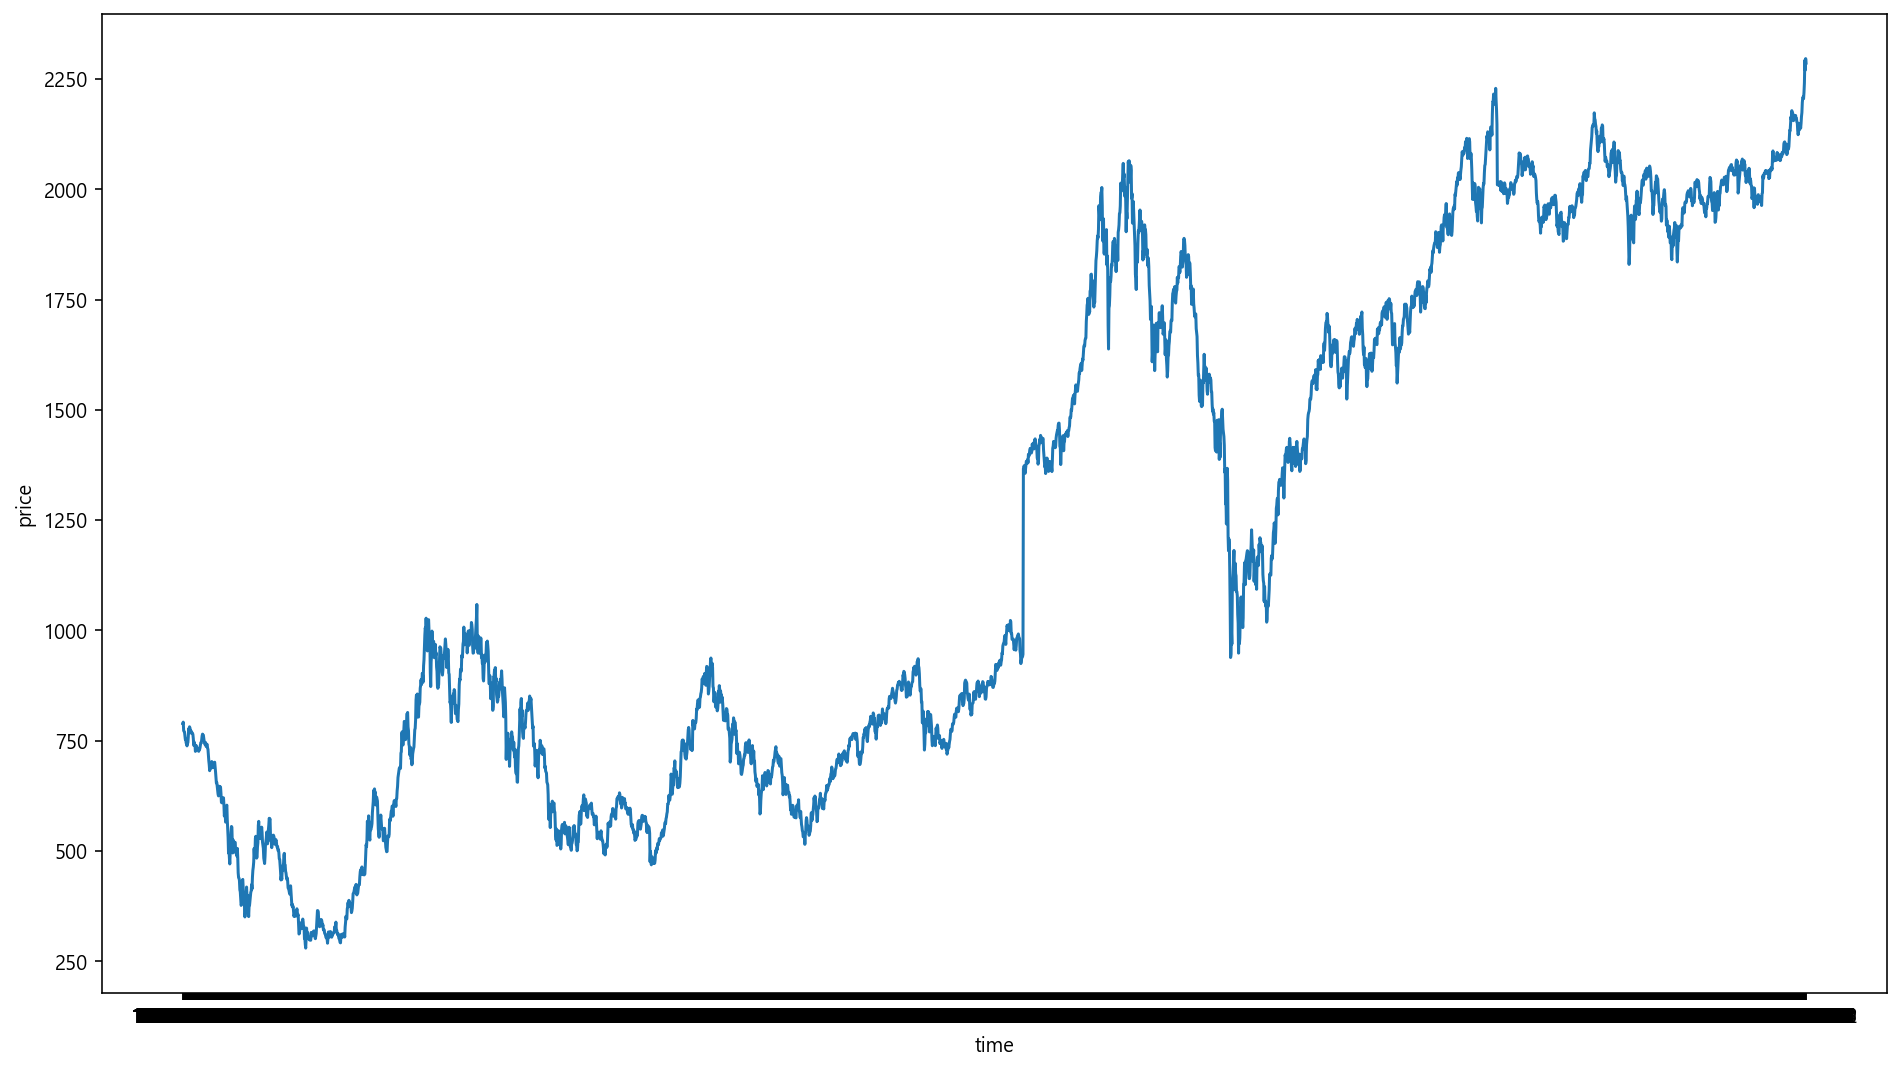

In [6]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=kospi_disaster_fin['Close'], x=kospi_disaster_fin['Date'])
plt.xlabel('time')
plt.ylabel('price')

In [7]:
from sklearn.preprocessing import MinMaxScaler

scalerX = MinMaxScaler()
scale_cols = ['Close','Open', 'High', 'Low', 'Volume']
disaster_scaled = scalerX.fit_transform(kospi_disaster_fin[scale_cols])

disaster_scaled = pd.DataFrame(disaster_scaled)
disaster_scaled.columns = scale_cols

print(disaster_scaled)

         Close      Open      High       Low    Volume
0     0.252459  0.253477  0.248892  0.253633  0.018669
1     0.254065  0.252195  0.249851  0.252217  0.019202
2     0.244603  0.253203  0.250235  0.244600  0.016809
3     0.243482  0.241612  0.240211  0.242177  0.014446
4     0.243120  0.243058  0.238460  0.243708  0.011677
...        ...       ...       ...       ...       ...
3964  0.972659  0.964649  0.959660  0.970853  0.104565
3965  0.998210  0.974934  0.985011  0.980484  0.112952
3966  0.986982  0.999026  1.000000  0.990494  0.172616
3967  1.000000  0.991260  0.987427  0.994158  0.189768
3968  0.994867  1.000000  0.986857  1.000000  0.135604

[3969 rows x 5 columns]


In [8]:
train = disaster_scaled # 훈련 데이터 정의

In [9]:
corona = pd.read_csv('kospi_corona.csv')
corona

,Date,Close,Open,High,Low,Volume,Change
0,2019-09-30,2063.05,2045.77,2064.99,2042.01,327620000.0,0.0064
1,2019-10-01,2072.42,2062.44,2077.48,2057.91,389340000.0,0.0045
2,2019-10-02,2031.91,2058.23,2058.23,2031.91,414460000.0,-0.0195
3,2019-10-04,2020.69,2028.40,2039.43,2020.69,402940000.0,-0.0055
4,2019-10-07,2021.73,2031.53,2034.94,2016.19,322180000.0,0.0005
...,...,...,...,...,...,...,...
245,2020-09-23,2333.24,2352.56,2354.46,2287.44,735040000.0,0.0003
246,2020-09-24,2272.70,2295.62,2309.74,2268.88,714880000.0,-0.0259
247,2020-09-25,2278.79,2295.19,2296.36,2267.63,697960000.0,0.0027
248,2020-09-28,2308.08,2301.16,2314.81,2291.32,605980000.0,0.0129


Text(0, 0.5, 'price')

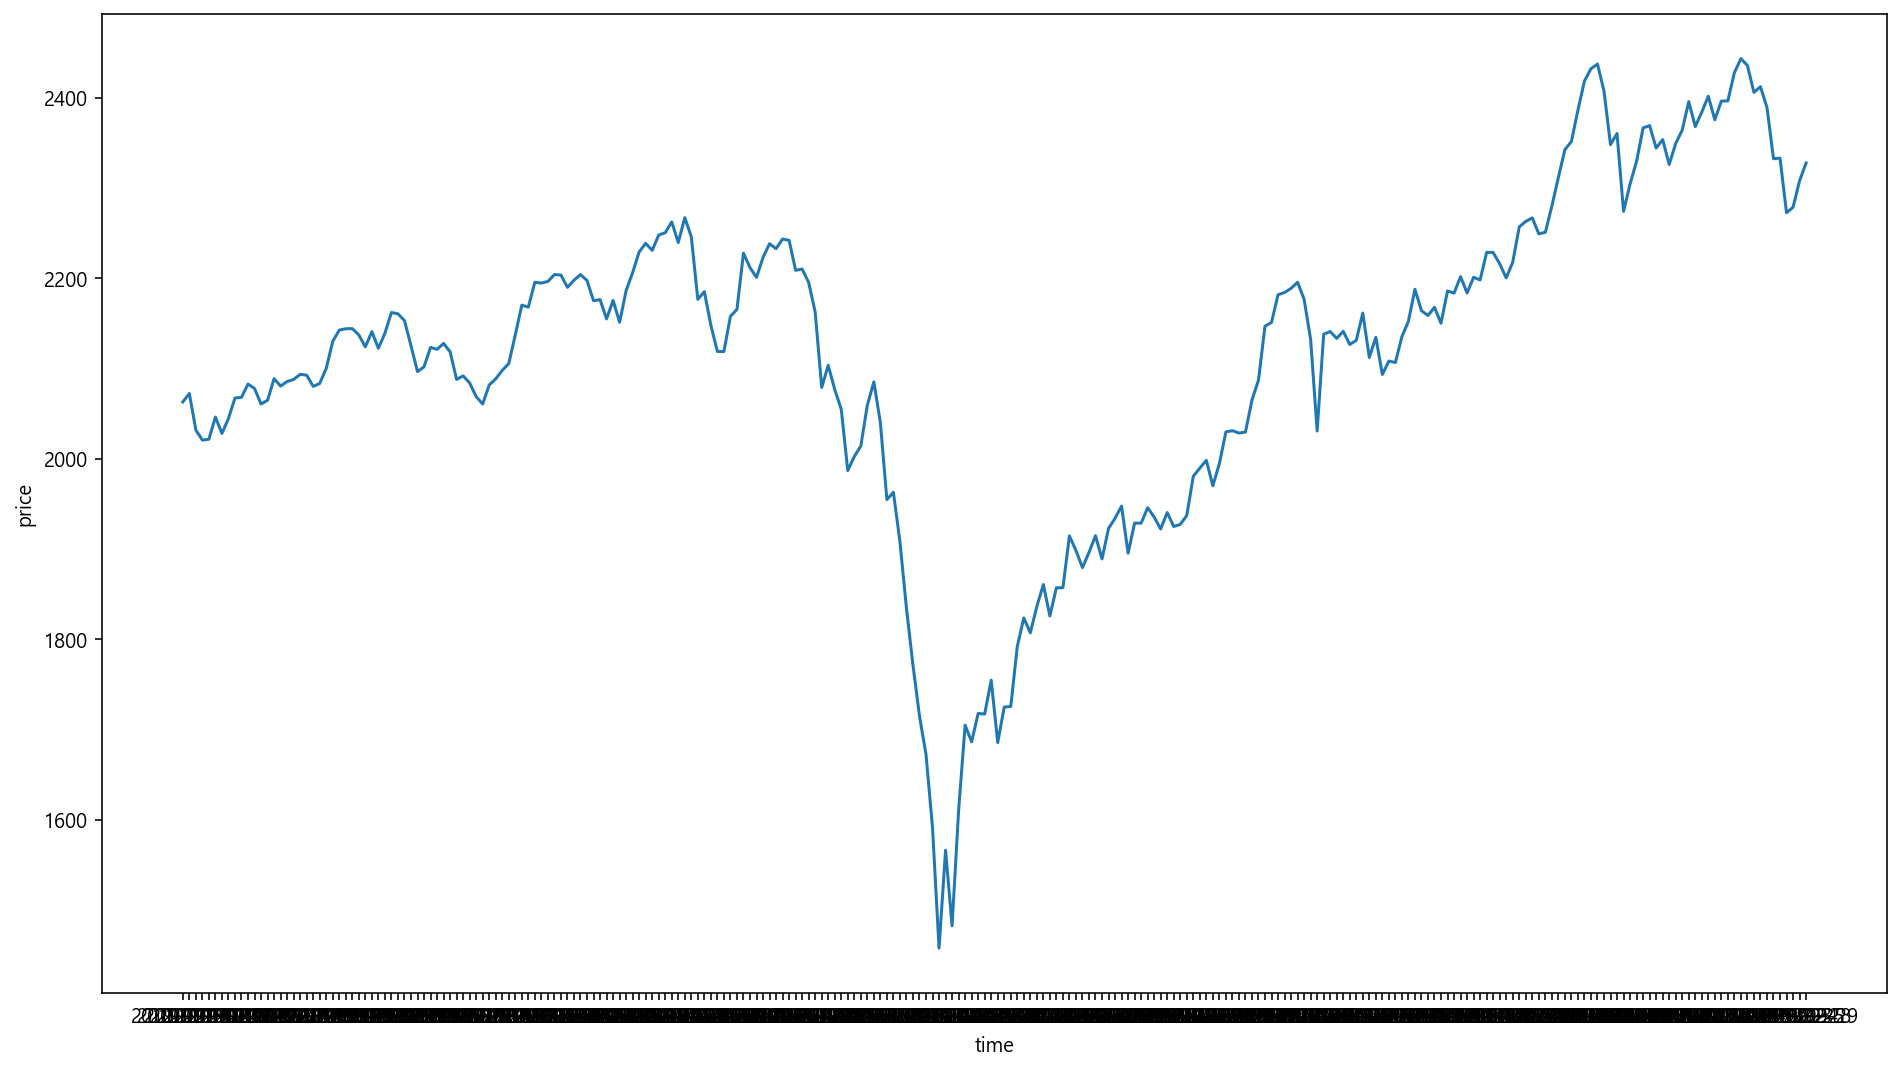

In [10]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=corona['Close'], x=corona['Date'])
plt.xlabel('time')
plt.ylabel('price')

In [11]:
scalerY = MinMaxScaler()
scale_cols = ['Close','Open', 'High', 'Low', 'Volume']
corona_scaled = scalerY.fit_transform(corona[scale_cols])

corona_scaled = pd.DataFrame(corona_scaled)
corona_scaled.columns = scale_cols

print(corona_scaled)

        Close      Open      High       Low    Volume
0    0.614043  0.582486  0.582354  0.608353  0.165013
1    0.623547  0.599482  0.595622  0.624406  0.196202
2    0.582459  0.595190  0.575174  0.598157  0.208896
3    0.571079  0.564777  0.555204  0.586829  0.203074
4    0.572134  0.567968  0.550434  0.582286  0.162264
..        ...       ...       ...       ...       ...
245  0.888086  0.895272  0.889837  0.856135  0.370892
246  0.826683  0.837219  0.842334  0.837397  0.360705
247  0.832860  0.836781  0.828121  0.836135  0.352155
248  0.862568  0.842868  0.847719  0.860052  0.305675
249  0.882660  0.873811  0.874296  0.889047  0.326010

[250 rows x 5 columns]


In [12]:
test = corona_scaled # 테스트 데이터 정의

In [13]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [14]:
feature_cols = ['Open', 'High', 'Low', 'Volume']
label_cols = ['Close']

train_feature = train[feature_cols]
train_label = train[label_cols]

# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 5)

In [15]:
# train, validation set 생성
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

x_train.shape, x_valid.shape

((3171, 5, 4), (793, 5, 4))

In [16]:
# test dataset (실제 예측 해볼 데이터)

test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, 5)
test_feature.shape, test_label.shape

((245, 5, 4), (245, 1))

#### 활성화함수 relu 사용 이유 --> 학습 속도가 빠르고 구현이 간단해서
#### 학습 데이터의 양이 크지 않고 과적합을 막기 위해 레이어 설정은 단순하게 구성
#### 최적화함수 adam은 널리 사용되고 잘 모르겠으면 일단 adam을 사용하라는 말이 있듯 학습속도와 정확도 모두 챙길 수 있는 신경망을 구축하기 위해 사용
#### 손실함수 mse는 제곱 연산으로 인해 차가 클수록 오차를 명확하게 보여줄 수 있어서 사용

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(4))
model.add(Dense(1))

Using TensorFlow backend.


In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 16)                1344      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 1,417
Trainable params: 1,417
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_path = 'D:/data_starfish/jupyter/LSTM_model'
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
filename = os.path.join(model_path, 'tmp_checkpoint_kospi.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                    epochs=28, # epochs = 28
                    batch_size=16, # batch_size =16
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

Train on 3171 samples, validate on 793 samples
Epoch 1/28
3171/3171 [==============================] - 2s 540us/step - loss: 0.0175 - val_loss: 3.3163e-04

Epoch 00001: val_loss improved from inf to 0.00033, saving model to D:/data_starfish/jupyter/LSTM_model\tmp_checkpoint_kospi.h5
Epoch 2/28
3171/3171 [==============================] - 1s 320us/step - loss: 3.0467e-04 - val_loss: 2.5559e-04

Epoch 00002: val_loss improved from 0.00033 to 0.00026, saving model to D:/data_starfish/jupyter/LSTM_model\tmp_checkpoint_kospi.h5
Epoch 3/28
3171/3171 [==============================] - 1s 375us/step - loss: 2.6532e-04 - val_loss: 2.3028e-04

Epoch 00003: val_loss improved from 0.00026 to 0.00023, saving model to D:/data_starfish/jupyter/LSTM_model\tmp_checkpoint_kospi.h5
Epoch 4/28
3171/3171 [==============================] - 1s 380us/step - loss: 2.4685e-04 - val_loss: 2.1660e-04

Epoch 00004: val_loss improved from 0.00023 to 0.00022, saving model to D:/data_starfish/jupyter/LSTM_model\tmp_c

In [20]:
# weight 로딩
model.load_weights(filename)

# 예측
pred = model.predict(test_feature)

In [21]:
pred

array([[0.57905984],
       [0.5754519 ],
       [0.57036823],
       [0.5732267 ],
       [0.5855968 ],
       [0.59249806],
       [0.60391194],
       [0.6121368 ],
       [0.6158875 ],
       [0.61366975],
       [0.6163301 ],
       [0.61967164],
       [0.62028563],
       [0.6213227 ],
       [0.6273264 ],
       [0.63208956],
       [0.63231117],
       [0.633056  ],
       [0.6326565 ],
       [0.64043826],
       [0.65147173],
       [0.6641003 ],
       [0.6729711 ],
       [0.6833529 ],
       [0.68471694],
       [0.68292665],
       [0.6799174 ],
       [0.67660874],
       [0.67862123],
       [0.6864762 ],
       [0.6895246 ],
       [0.6894624 ],
       [0.6816822 ],
       [0.66780233],
       [0.6610545 ],
       [0.66275465],
       [0.6641664 ],
       [0.66249347],
       [0.66400707],
       [0.65500987],
       [0.6419614 ],
       [0.62836313],
       [0.621788  ],
       [0.6159184 ],
       [0.6180138 ],
       [0.62141603],
       [0.6291954 ],
       [0.642

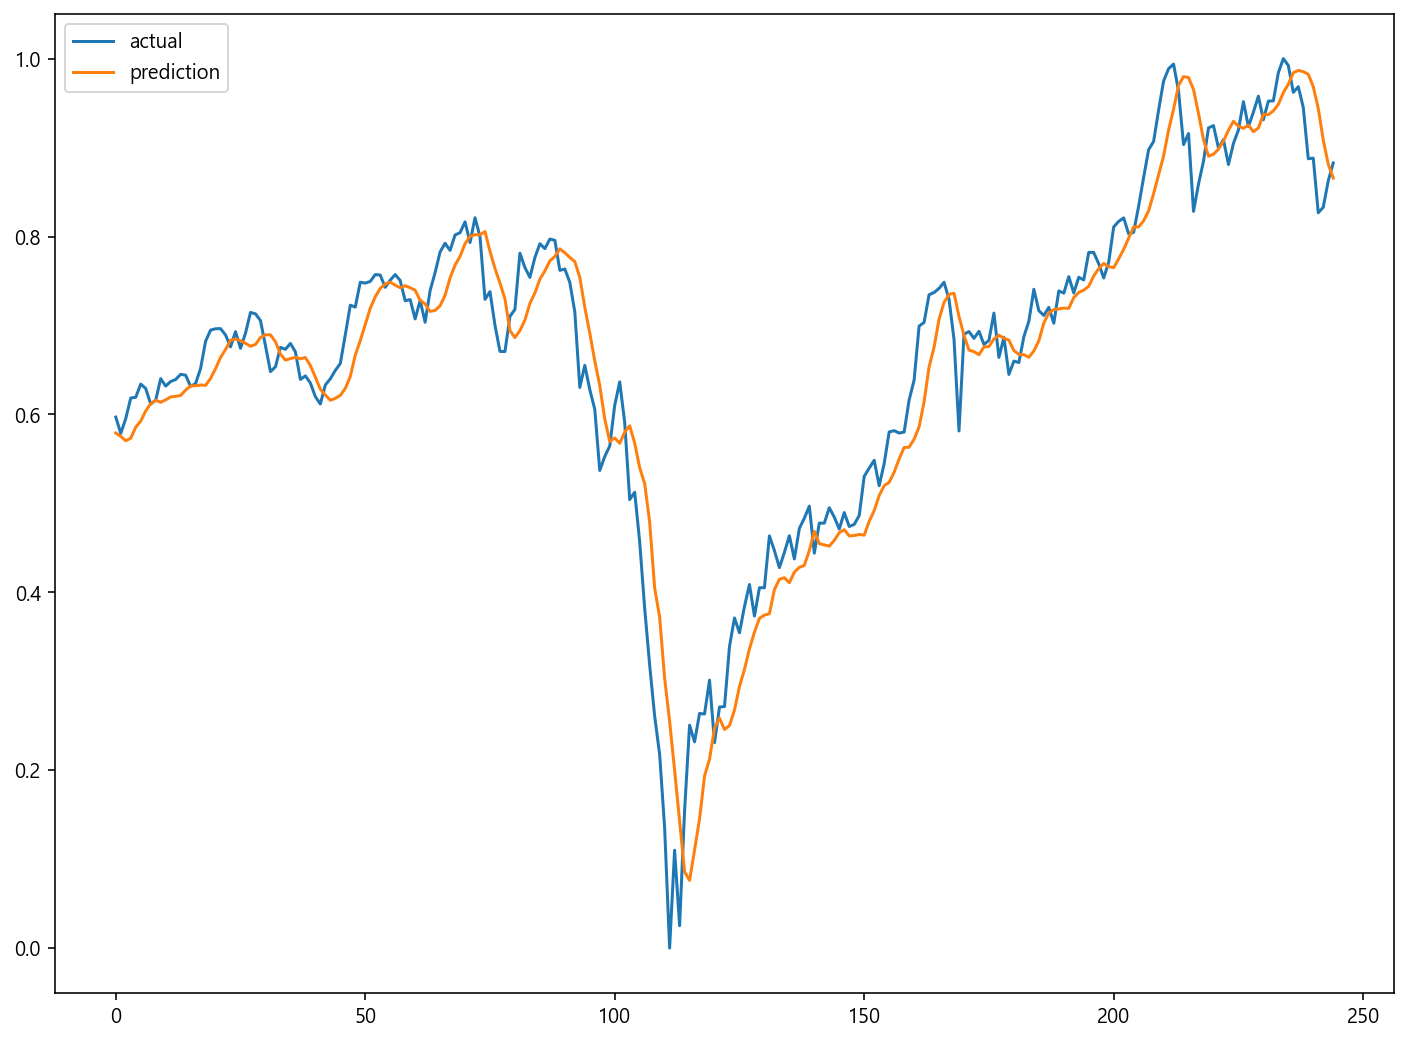

In [22]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

#### inverse_transform을 돌리기 위해서 array 형태를 바꿔주는 과정을 거쳐야함 (다른 방법이 있을 수도 있겠지만 찾지 못함 --> 추후에 찾아볼 예정)

In [23]:
list_of_lists = pred.tolist()

In [26]:
list_of_lists

[[0.5790598392486572],
 [0.5754519104957581],
 [0.570368230342865],
 [0.5732266902923584],
 [0.5855967998504639],
 [0.5924980640411377],
 [0.6039119362831116],
 [0.6121367812156677],
 [0.6158875226974487],
 [0.613669753074646],
 [0.616330087184906],
 [0.619671642780304],
 [0.6202856302261353],
 [0.6213226914405823],
 [0.6273264288902283],
 [0.6320895552635193],
 [0.6323111653327942],
 [0.6330559849739075],
 [0.6326565146446228],
 [0.6404382586479187],
 [0.651471734046936],
 [0.6641002893447876],
 [0.6729711294174194],
 [0.6833528876304626],
 [0.6847169399261475],
 [0.6829266548156738],
 [0.6799173951148987],
 [0.6766087412834167],
 [0.678621232509613],
 [0.6864761710166931],
 [0.6895245909690857],
 [0.689462423324585],
 [0.6816822290420532],
 [0.6678023338317871],
 [0.6610544919967651],
 [0.6627546548843384],
 [0.6641663908958435],
 [0.6624934673309326],
 [0.6640070676803589],
 [0.6550098657608032],
 [0.641961395740509],
 [0.6283631324768066],
 [0.6217880249023438],
 [0.615918397903442

In [24]:
list_ = [y for x in list_of_lists for y in x]

In [25]:
list_

[0.5790598392486572,
 0.5754519104957581,
 0.570368230342865,
 0.5732266902923584,
 0.5855967998504639,
 0.5924980640411377,
 0.6039119362831116,
 0.6121367812156677,
 0.6158875226974487,
 0.613669753074646,
 0.616330087184906,
 0.619671642780304,
 0.6202856302261353,
 0.6213226914405823,
 0.6273264288902283,
 0.6320895552635193,
 0.6323111653327942,
 0.6330559849739075,
 0.6326565146446228,
 0.6404382586479187,
 0.651471734046936,
 0.6641002893447876,
 0.6729711294174194,
 0.6833528876304626,
 0.6847169399261475,
 0.6829266548156738,
 0.6799173951148987,
 0.6766087412834167,
 0.678621232509613,
 0.6864761710166931,
 0.6895245909690857,
 0.689462423324585,
 0.6816822290420532,
 0.6678023338317871,
 0.6610544919967651,
 0.6627546548843384,
 0.6641663908958435,
 0.6624934673309326,
 0.6640070676803589,
 0.6550098657608032,
 0.641961395740509,
 0.6283631324768066,
 0.6217880249023438,
 0.6159183979034424,
 0.6180137991905212,
 0.6214160323143005,
 0.6291953921318054,
 0.6426748037338257,


In [28]:
pred_jaebal = np.array([list_,list_,list_,list_,list_]).T

In [29]:
pred_jaebal

array([[0.57905984, 0.57905984, 0.57905984, 0.57905984, 0.57905984],
       [0.57545191, 0.57545191, 0.57545191, 0.57545191, 0.57545191],
       [0.57036823, 0.57036823, 0.57036823, 0.57036823, 0.57036823],
       ...,
       [0.90858001, 0.90858001, 0.90858001, 0.90858001, 0.90858001],
       [0.88135284, 0.88135284, 0.88135284, 0.88135284, 0.88135284],
       [0.86568868, 0.86568868, 0.86568868, 0.86568868, 0.86568868]])

In [48]:
real_pred = scalerY.inverse_transform(pred_jaebal)[:,0]

In [49]:
real_pred

array([2028.55825791, 2025.00105663, 2019.98885302, 2022.80712303,
       2035.00330884, 2041.80754126, 2053.06093446, 2061.17013807,
       2064.86814413, 2062.68155635, 2065.30448616, 2068.59905948,
       2069.20441427, 2070.2268944 , 2076.1462193 , 2080.84237612,
       2081.06087035, 2081.79521783, 2081.40136405, 2089.07369673,
       2099.95204147, 2112.40303928, 2121.14915534, 2131.38494603,
       2132.72981975, 2130.96470605, 2127.99775654, 2124.73562238,
       2126.71981798, 2134.46431605, 2137.46987522, 2137.40858165,
       2129.7377769 , 2116.05303302, 2109.40006584, 2111.07632444,
       2112.46821144, 2110.81880918, 2112.31112831, 2103.44042705,
       2090.57541852, 2077.16834683, 2070.68568527, 2064.89858523,
       2066.96452517, 2070.3189229 , 2077.98890492, 2091.27879599,
       2114.94222668, 2130.97422624, 2148.72832235, 2166.78248073,
       2179.41371571, 2188.85580466, 2193.67601778, 2195.81353544,
       2192.45226203, 2189.57869265, 2191.81282261, 2189.60995

In [32]:
cols = ['Close_pred']
disaster = pd.DataFrame(real_pred, columns=cols)

In [33]:
disaster

,Close_pred
0,2028.558258
1,2025.001057
2,2019.988853
3,2022.807123
4,2035.003309
...,...
240,2412.448803
241,2388.363370
242,2353.445370
243,2326.601021


In [34]:
date = corona['Date']
close = corona['Close']

In [35]:
disaster['date'] = date
disaster['Close'] = close

In [36]:
disaster = disaster[['date','Close','Close_pred']]

In [37]:
disaster

,date,Close,Close_pred
0,2019-09-30,2063.05,2028.558258
1,2019-10-01,2072.42,2025.001057
2,2019-10-02,2031.91,2019.988853
3,2019-10-04,2020.69,2022.807123
4,2019-10-07,2021.73,2035.003309
...,...,...,...
240,2020-09-16,2435.92,2412.448803
241,2020-09-17,2406.17,2388.363370
242,2020-09-18,2412.40,2353.445370
243,2020-09-21,2389.39,2326.601021


In [34]:
disaster.to_csv('금융위기_코스피_예측.csv',encoding='utf-8-sig')

In [38]:
sum_dif = []
for i in range(len(disaster)):
    result = abs((disaster['Close'][i] - disaster['Close_pred'][i])/disaster['Close'][i])
    sum_dif.append(result)
    temp = sum(sum_dif)
    fin = (temp/245)*100
    accuracy = 100-fin
print('정확도:',accuracy,'%')

정확도: 98.58530259382833 %


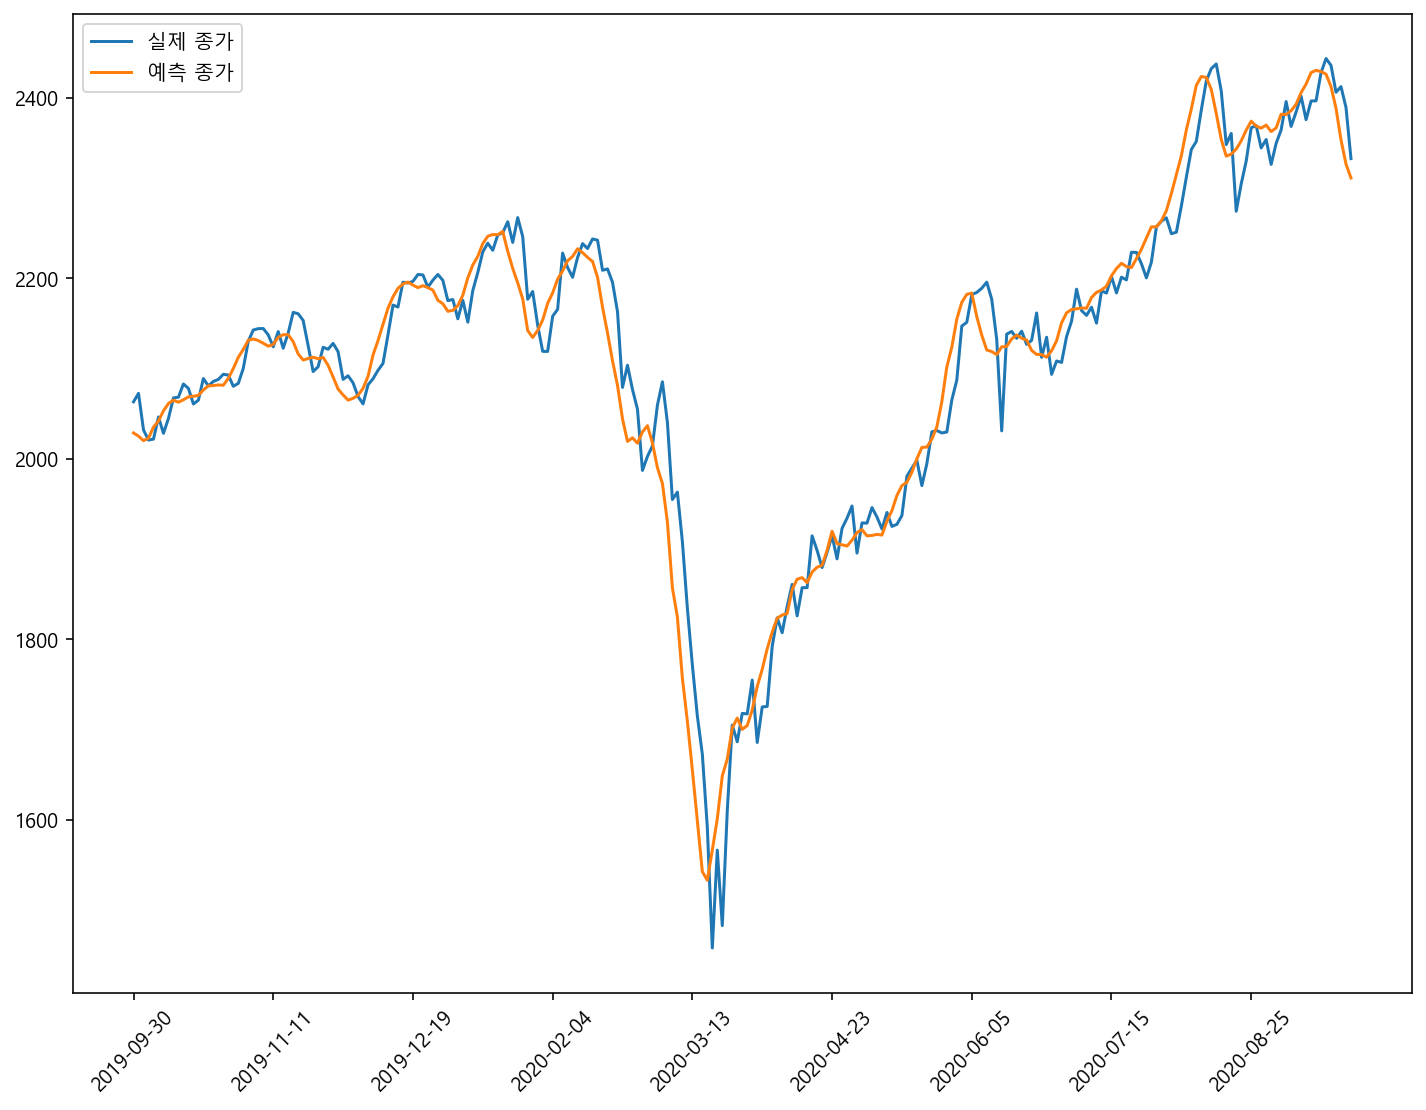

In [50]:
x = disaster['date']
xtic=np.arange(0,len(x),step=28)
xdays=[x[i] for i in xtic]
plt.figure(figsize=(12, 9))
plt.plot(disaster['Close'], label='실제 종가')
plt.plot(disaster['Close_pred'], label='예측 종가')
plt.xticks(xtic,xdays,rotation=45)
plt.legend()
plt.show()